# Практикум 10. 
# Экстремумы функции нескольких переменных

## 1. Минимизация функции двух переменных.

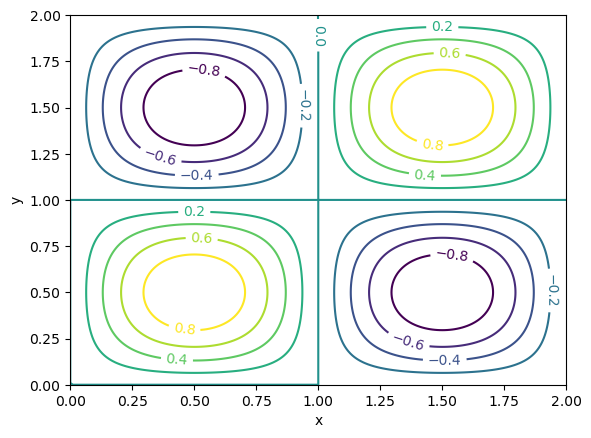

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 201)
y = np.linspace(0, 2, 201)
X, Y = np.meshgrid(x, y)

Z = np.sin(np.pi * X) * np.sin(np.pi * Y)

fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z, levels=np.linspace(-0.8, 0.8, 9))
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlabel('x'); plt.ylabel('y')
plt.show()

In [4]:
def f(t):
    x, y = t
    return np.sin(np.pi * x) * np.sin(np.pi * y)

from scipy.optimize import fmin
minimum = fmin(f, np.array([1, 1]), xtol=1e-9, disp=False)
print('Min:', minimum)

Min: [1.5 0.5]


In [6]:
minimum, f_min, _, _, _ = fmin(f, np.array([1, 1]), xtol=1e-9, disp=False, full_output=True)
print('Min:', minimum)
print('f:', f_min)

Min: [1.5 0.5]
f: -1.0


### Упражнение 1. 
Постройте линии уровня функции z=f(x,y) и найдите экстремумы функции.

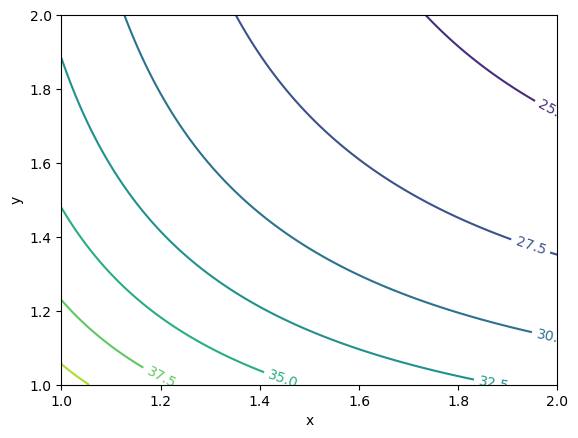

Минимум функции:  22.10418899185178
Координаты точки минимума:  [2.71441584 2.71441584]
Максимум функции:  41.0
Координаты точки максимума:  [1. 1.]


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x*y + 20/x + 20/y

x = np.linspace(1, 2, 1000)
y = np.linspace(1, 2, 1000)
X, Y = np.meshgrid(x, y)

Z =  X*Y + 20/X + 20/Y

fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z)
ax.clabel(cs, cs.levels, inline=True, fontsize=10)
plt.xlabel('x'); plt.ylabel('y')
plt.show()

# Находим минимум функции с помощью метода BFGS
res = minimize(lambda x: f(x[0], x[1]), x0=[1, 1], method='BFGS')

# Выводим значение минимума функции и координаты точки, в которой он достигается
print("Минимум функции: ", res.fun)
print("Координаты точки минимума: ", res.x)

# Находим максимум функции с помощью метода BFGS
res = minimize(lambda x: -f(x[0], x[1]), x0=[1, 1], method='BFGS')

# Выводим значение максимума функции и координаты точки, в которой он достигается
print("Максимум функции: ", -res.fun)
print("Координаты точки максимума: ", res.x)

### Упражнение 2. 
Создайте def-функцию, вычисляющую значения первых и вторых частных производных функции f(x,y) в точке (x0,y0) и значения главных миноров матрицы, составленной из вторых производных.

In [18]:
def partial_derivatives(f, x0, y0, deltX = 1e-6, deltY = 1e-6):
    # Вычисляем первые частные производные
    fx = (f(x0 + deltX, y0) - f(x0, y0)) / deltX
    fy = (f(x0, y0 + deltY) - f(x0, y0)) / deltY
    
    # Вычисляем вторые частные производные
    fxx = (f(x0 + deltX, y0) - 2*f(x0, y0) + f(x0 - deltX, y0)) / deltX**2
    fyy = (f(x0, y0 + deltY) - 2*f(x0, y0) + f(x0, y0 - deltY)) / deltY**2
    fxy = (f(x0 + deltX, y0 + deltY) - f(x0 + deltX, y0 - deltY) - f(x0 - deltX, y0 + deltY) + f(x0 - deltX, y0 - deltY)) / (4*(deltY)**2)
    
    # Вычисляем значения главных миноров матрицы вторых производных
    D1 = fxx
    D2 = fxx*fyy - fxy**2
    
    return fx, fy, fxx, fyy, fxy, D1, D2

In [19]:
def f(x, y):
    return x**2 + y**2

x0 = 1
y0 = 2

fx, fy, fxx, fyy, fxy, D1, D2 = partial_derivatives(f, x0, y0)

print("fx =", fx)
print("fy =", fy)
print("fxx =", fxx)
print("fyy =", fyy)
print("fxy =", fxy)
print("D1 =", D1)
print("D2 =", D2)

fx = 2.0000010003684565
fy = 4.0000010006480125
fxx = 2.000177801164682
fyy = 2.001065979584382
fxy = 0.0002220446049250313
D1 = 2.000177801164682
D2 = 4.002487701726734


### Упражнение 3.
    а) Найти экстремумы функции z= x**2 + y**2 - 2*log(x) - 18*log(y)
    б) С помощью созданной def-функции проверьте выполнение необходимого и достаточного условия экстремума

In [42]:
import numpy as np

def f(x, y):
    return x**2 + y**2 - 2*np.log(x) - 18*np.log(y)

from scipy.optimize import minimize

# Находим минимум функции
res = minimize(lambda x: f(x[0], x[1]), x0=[1, 1], method='BFGS')
print("Минимум функции: ", res.fun)
print("Координаты точки минимума: ", res.x)

# Находим максимум функции
res = minimize(lambda x: -f(x[0], x[1]), x0=[1, 1], method='BFGS')
print("Максимум функции: ", -res.fun)
print("Координаты точки максимума: ", res.x)

x0 = 3.12993274
y0 = 0.48242911

fx, fy, fxx, fyy, fxy, D1, D2 = partial_derivatives(f, x0, y0)

print("fx =", fx)
print("fy =", fy)
print("fxx =", fxx)
print("fyy =", fyy)
print("fxy =", fxy)
print("D1 =", D1)
print("D2 =", D2)

Минимум функции:  -9.77502119602563
Координаты точки минимума:  [1.         2.99999958]
Максимум функции:  nan
Координаты точки максимума:  [ 1.00000e+00 -1.03324e+03]
fx = 5.620875214162879
fy = -36.34628343718305
fxx = 2.2026824808563106
fyy = 79.33920187497279
fxy = 0.0008881784197001252
D1 = 2.2026824808563106
D2 = 174.7590692262638


/tmp/ipykernel_11264/2612831680.py:4: RuntimeWarning: invalid value encountered in log
  return x**2 + y**2 - 2*np.log(x) - 18*np.log(y)
/tmp/ipykernel_11264/2612831680.py:4: RuntimeWarning: invalid value encountered in log
  return x**2 + y**2 - 2*np.log(x) - 18*np.log(y)
/tmp/ipykernel_11264/2612831680.py:4: RuntimeWarning: invalid value encountered in log
  return x**2 + y**2 - 2*np.log(x) - 18*np.log(y)


## 3. Минимизация функции трёх переменных.

In [24]:
import sympy as sp
from sympy.abc import x, y, z

df1 = x - z
df2 = x - y
df3 = x + z
s = sp.solve([df1, df2, df3])

print(s)
print(s[x])

{x: 0, y: 0, z: 0}
0


In [25]:
s=sp.solve([x**2+y**2-1, x-y, z-y])
print(s[0])
print(s[1])
print('x:', [sp.N(s[0][x]), sp.N(s[1][x])])

{x: -sqrt(2)/2, y: -sqrt(2)/2, z: -sqrt(2)/2}
{x: sqrt(2)/2, y: sqrt(2)/2, z: sqrt(2)/2}
x: [-0.707106781186548, 0.707106781186548]


### Упражнение 4. 
Создайте def-функцию, которая находит стационарные точки функции трёх переменных и проверяет выполнение достаточного условия экстремума по критерию Сильвестра.


In [93]:
import sympy

def stationary_points(u):
    du_dx = u.diff(x)
    du_dy = u.diff(y)
    du_dz = u.diff(z)
     
    stationarPoints = sp.solve([du_dx, du_dy, du_dz])
    
    for point in stationarPoints:
        print("Point:")
        sympy.pprint(point)
        # вычисляем гессиан функции
        hessian = sympy.Matrix([[u.diff(x_, y_, z).subs([(x, point[x]), (y, point[y]), (z, point[z])]) for x_ in [x, y, z]] for y_ in [x, y, z]])
        print('Hessian matrix:')
        display(hessian)

        # вычисляем угловые миноры гессиана
        minors = [hessian[:i, :i].det() for i in range(1, hessian.shape[0] + 1)]
        print('Minors:', minors)

        # проверяем условие Сильвестра
        if all(minor > 0 for minor in minors):
            print('The point is a minimum')
        elif all((-1)**i * minor > 0 for i, minor in enumerate(minors)):
            print('The point is a maximum')
        else:
            print('The point is a saddle point')
        print()



### Упражнение 5. 
Используя def-функцию, найдите точки экстремума функции u=u(x,y,z) (таблица 1).

In [94]:
import sympy
x, y, z = sympy.symbols('x y z')

u = 5*x + y/x + z/y + 2/z

stationary_points(u)

Point:
⎧    4 ____                 3/4 ⎫
⎪   -╲╱ 10       √10     -10    ⎪
⎨x: ────────, y: ───, z: ───────⎬
⎪      5          5         5   ⎪
⎩                               ⎭
Hessian matrix:


Matrix([
[0,            0,     0],
[0, 5*sqrt(10)/2,     0],
[0,            0, -15/2]])

Minors: [0, 0, 0]
The point is a saddle point

Point:
⎧   4 ____               3/4⎫
⎪   ╲╱ 10      √10     10   ⎪
⎨x: ──────, y: ───, z: ─────⎬
⎪     5         5        5  ⎪
⎩                           ⎭
Hessian matrix:


Matrix([
[0,            0,     0],
[0, 5*sqrt(10)/2,     0],
[0,            0, -15/2]])

Minors: [0, 0, 0]
The point is a saddle point

Point:
⎧    4 ____                    3/4  ⎫
⎪   -╲╱ 10 ⋅ⅈ      -√10      10   ⋅ⅈ⎪
⎨x: ──────────, y: ─────, z: ───────⎬
⎪       5            5          5   ⎪
⎩                                   ⎭
Hessian matrix:


Matrix([
[0,             0,     0],
[0, -5*sqrt(10)/2,     0],
[0,             0, -15/2]])

Minors: [0, 0, 0]
The point is a saddle point

Point:
⎧   4 ____                    3/4   ⎫
⎪   ╲╱ 10 ⋅ⅈ     -√10      -10   ⋅ⅈ ⎪
⎨x: ────────, y: ─────, z: ─────────⎬
⎪      5           5           5    ⎪
⎩                                   ⎭
Hessian matrix:


Matrix([
[0,             0,     0],
[0, -5*sqrt(10)/2,     0],
[0,             0, -15/2]])

Minors: [0, 0, 0]
The point is a saddle point



## Ответить на контрольные вопросы:
### 1) Почему, прежде чем использовать функцию fmin, рекомендуется построить линии уровня функции?
Построение линий уровня функции помогает визуализировать форму функции и понять, как она ведет себя в окрестности точки, которую мы хотим минимизировать. Это также помогает выбрать правильный метод оптимизации и начальное приближение для этого метода, что может ускорить процесс минимизации.
### 2) Сформулируйте необходимое условие экстремума функции двух переменных?
Необходимое условие экстремума функции двух переменных заключается в том, что частные производные функции по каждой переменной равны нулю в точке экстремума.
### 3) Сформулируйте достаточное условие экстремума функции двух переменных?
Достаточное условие экстремума функции двух переменных состоит в проверке знаков вторых производных функции в точке экстремума. Если вторые производные положительны, то точка является точкой минимума. Если вторые производные отрицательны, то точка является точкой максимума. Если же знаки вторых производных меняются в точке экстремума, то точка является седловой точкой.
### 4) Сформулируйте достаточное условие экстремума функции трех переменных?
Достаточное условие экстремума функции трех переменных заключается в проверке знаков всех угловых миноров гессиана функции в точке экстремума. Если все угловые миноры положительны, то точка является точкой минимума. Если знаки угловых миноров чередуются, начиная с положительного, то точка является точкой максимума. Если же знаки угловых миноров чередуются, начиная с отрицательного, то точка является седловой точкой, то есть не является точкой экстремума.